In [1]:
from MAD import *
from Quantile import *
from weibull_post import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import *
from tqdm import tqdm
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
filo=pd.read_csv('FILO2019_DEC_COM.csv',sep=';')

/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
np.isnan

In [36]:
Q1=np.array(filo["Q1"])

In [40]:
Q1 = Q1[~np.isnan(Q1)]

In [44]:
a1_init=1/(2*(np.log(np.mean(Q1))-np.mean(np.log(Q1))))
b1_init=a1_init/np.mean(Q1)
a1_init,b1_init

(15.472611493968671, 0.0009900175766851527)

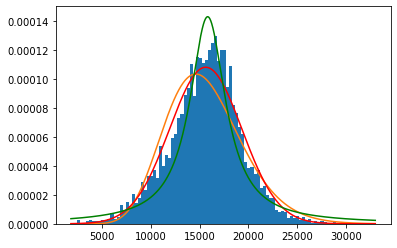

In [48]:
plt.hist(Q1,bins=100,density=True)
x=np.linspace(np.min(Q1),np.max(Q1),1000)

plt.plot(x,gamma.pdf(x,a=a1_init,scale=1/b1_init))
plt.plot(x,norm.pdf(x,loc=np.mean(Q1),scale=np.std(Q1)),color='red')
plt.plot(x,cauchy.pdf(x,loc=np.median(Q1),scale=scipy.stats.median_abs_deviation(Q1)),color='green')

In [27]:
filo.iloc[np.where(not(np.isnan(filo["Q1"])))]["Q1"]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [3]:
filo.head()


,CODGEO,NBMEN19,NBPERS19,NBUC19,PMIMP19,Q119,Q219,Q319,Q3_Q1,D119,...,OPR5D919,OPR5RD,OPR5S80S2019,OPR5GI19,OPR5PACT19,OPR5PTSA19,OPR5PCHO19,OPR5PBEN19,OPR5PPEN19,OPR5PAUT19
0,1001,322,819,542.7,NaN,NaN,24210,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,114,267,179.5,NaN,NaN,23380,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1004,6713,15041,10298.9,56.0,11970.0,19690,27930.0,15970.0,6250.0,...,150250.0,84.9,158.8,0.8,9.2,NaN,NaN,NaN,4.3,86.5
3,1005,720,1823,1204.3,NaN,NaN,24100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1007,1163,2857,1892.3,63.0,17360.0,23340,30630.0,13270.0,11110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
col=list(filo.columns)
for i in range(len(col)):
    col[i]=col[i].replace("19","")
print(col)
filo.rename(columns=dict(zip(filo.columns,col)),inplace=True)
filo.columns

['CODGEO', 'NBMEN', 'NBPERS', 'NBUC', 'PMIMP', 'Q1', 'Q2', 'Q3', 'Q3_Q1', 'D1', 'D2', 'D3', 'D4', 'D6', 'D7', 'D8', 'D9', 'RD', 'S80S20', 'GI', 'PACT', 'PTSA', 'PCHO', 'PBEN', 'PPEN', 'PAUT', 'AGE1Q1', 'AGE1Q2', 'AGE1Q3', 'AGE1Q3_Q1', 'AGE1D1', 'AGE1D2', 'AGE1D3', 'AGE1D4', 'AGE1D6', 'AGE1D7', 'AGE1D8', 'AGE1D9', 'AGE1RD', 'AGE1S80S20', 'AGE1GI', 'AGE1PACT', 'AGE1PTSA', 'AGE1PCHO', 'AGE1PBEN', 'AGE1PPEN', 'AGE1PAUT', 'AGE2Q1', 'AGE2Q2', 'AGE2Q3', 'AGE2Q3_Q1', 'AGE2D1', 'AGE2D2', 'AGE2D3', 'AGE2D4', 'AGE2D6', 'AGE2D7', 'AGE2D8', 'AGE2D9', 'AGE2RD', 'AGE2S80S20', 'AGE2GI', 'AGE2PACT', 'AGE2PTSA', 'AGE2PCHO', 'AGE2PBEN', 'AGE2PPEN', 'AGE2PAUT', 'AGE3Q1', 'AGE3Q2', 'AGE3Q3', 'AGE3Q3_Q1', 'AGE3D1', 'AGE3D2', 'AGE3D3', 'AGE3D4', 'AGE3D6', 'AGE3D7', 'AGE3D8', 'AGE3D9', 'AGE3RD', 'AGE3S80S20', 'AGE3GI', 'AGE3PACT', 'AGE3PTSA', 'AGE3PCHO', 'AGE3PBEN', 'AGE3PPEN', 'AGE3PAUT', 'AGE4Q1', 'AGE4Q2', 'AGE4Q3', 'AGE4Q3_Q1', 'AGE4D1', 'AGE4D2', 'AGE4D3', 'AGE4D4', 'AGE4D6', 'AGE4D7', 'AGE4D8', 'AGE4D9'

Index(['CODGEO', 'NBMEN', 'NBPERS', 'NBUC', 'PMIMP', 'Q1', 'Q2', 'Q3', 'Q3_Q1',
       'D1',
       ...
       'OPR5D9', 'OPR5RD', 'OPR5S80S20', 'OPR5GI', 'OPR5PACT', 'OPR5PTSA',
       'OPR5PCHO', 'OPR5PBEN', 'OPR5PPEN', 'OPR5PAUT'],
      dtype='object', length=572)

In [5]:
np.min(filo.iloc[np.where(pd.notna(filo["D1"]))]["NBPERS"])

1914

In [6]:
C=np.array([str(cod)[:2] for cod in list(filo["CODGEO"])]).astype(str)


In [7]:
filo=filo.drop(np.where(C=="2A")[0])
filo=filo.drop(np.where(C=="2B")[0])

In [8]:
int_codegeo=filo["CODGEO"].astype(int)

In [9]:
np.unique(int_codegeo)

array([ 1001,  1002,  1004, ..., 97422, 97423, 97424])

In [10]:
AM=filo.iloc[np.where(np.logical_and(int_codegeo<7000,int_codegeo>=6000))]
AM.shape

(135, 572)

In [232]:
AM=filo.iloc[np.where(np.logical_and(int_codegeo<7000,int_codegeo>=6000))]
AM=AM.iloc[np.where(pd.notna(AM["Q1"]))[0]]
AM=AM.iloc[np.where(AM["NBPERS"]<25000)[0]]
N_AM=np.array(AM["NBPERS"].astype(int))
Q_AM=np.array(AM[["D1","D2","Q1","D3","D4","Q2","D6","D7","Q3","D8","D9"]].astype(float))
P_AM=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]
CODE_AM=np.array(AM["CODGEO"])

AM.shape

(46, 572)

In [233]:
len(np.where(N_AM<10000)[0])

37

(array([ 9., 10.,  9.,  1.,  2.,  3.,  3.,  1.,  0.,  2.,  2.,  0.,  1.,
         0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 2004. ,  3132.4,  4260.8,  5389.2,  6517.6,  7646. ,  8774.4,
         9902.8, 11031.2, 12159.6, 13288. , 14416.4, 15544.8, 16673.2,
        17801.6, 18930. , 20058.4, 21186.8, 22315.2, 23443.6, 24572. ]),
 <BarContainer object of 20 artists>)

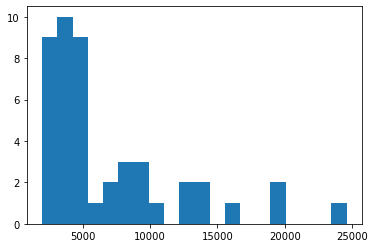

In [234]:
plt.hist(N_AM,bins=20)

In [14]:
np.where(np.logical_and(pd.notna(filo["Q1"]),pd.isna(filo["Q3_Q1"])))

(array([], dtype=int64),)

In [15]:
np.array(Q_AM).T[0]

array([14320., 12340., 10330.,  8200.,  6150., 13280.,  6810.,  9880.,
        8200., 11620., 11730., 14240., 11210.,  6810.,  9800., 11450.,
       15290., 12230., 13700., 11460.,  9400., 11210., 11140., 12280.,
       12430., 11480.,  9000., 13890., 12560., 13340.,  7090., 10900.,
       12310., 11320., 11160., 11660.,  9480., 11500., 11600., 10650.,
        8380., 11300., 10430.,  7630.,  9510., 10480.])

In [16]:
len(Q_AM[0]),len(P_AM)

(11, 11)

In [17]:
def lprior_gamma(x,par_prior):
    a_0,b_0=par_prior
    return np.log(x)*(a_0-1)-b_0*x
def post_gamma_MH(current,X,par_prior,T,std_prop1=.1,std_prop2=.1):
    def llike_a(a,b,X):
        N=len(X)
        return (a-1)*np.sum(np.log(X))+N*a*np.log(b)-N*np.log(scipy.special.gamma(a))
    def llike_b(a,b,X):
        N=len(X)
        return N*a*np.log(b)-b*np.sum(X)

    a,b=current
    a_star=np.random.normal(a,std_prop1)
    if a_star>0: 
        if np.random.uniform(0,1,1)<np.exp(llike_a(a_star,b,X)-llike_a(a,b,X)+lprior_gamma(a_star,par_prior[:2])-lprior_gamma(a,par_prior[:2])): a=a_star
        
    b_star=np.random.normal(b,std_prop2)
    if b_star>0: 
        if np.random.uniform(0,1,1)<np.exp(llike_b(a,b_star,X)-llike_b(a,b,X)+lprior_gamma(b_star,par_prior[2:])-lprior_gamma(b,par_prior[2:])): b=b_star
        
    return a,b

def post_NG(X, par_prior, T):
    n = len(X)
    [mu_0, nu, alpha, beta] = par_prior[:4]

    tau = np.random.gamma(
        shape=alpha + n / 2,
        scale=1
        / (
            beta
            + np.sum((X - np.mean(X)) ** 2) / 2
            + n * nu * (np.mean(X) - mu_0) ** 2 / (2 * (nu + n))
        ),
        size=T
    )[0]
    mu = np.random.normal(
        loc=(nu * mu_0 + np.sum(X)) / (nu + n),
        scale=1 / np.sqrt((nu + n) * tau),
        size=T,
    )[0]
    return np.array([mu, np.sqrt(1/tau)])

In [183]:
w["chains_0"][:,-1]

array([8.65823431e-01, 1.93983816e-04, 5.55157758e+01, 2.01115862e-03,
       4.00372262e+01, 2.42100868e+01])

In [186]:

from multiprocessing import Pool,cpu_count
from functools import partial

# Pick the amount of processes that works best for you

    
def updateGibbs(kk,Q,q_sim,q_tot,N,theta,theta_0,K_L,I,G,distribution,std_prop_quantile,std_prop1,std_prop2,std_prop3,lenT,lenS):
    np.random.seed()
    #print("k=",kk,"Qk=",len(Q[kk]),"Qsim=",len(q_sim),"lenS=",lenS[kk],"Qtotk=",len(q_tot[kk]),"lenT=",lenT[kk],"G=0",np.sum(np.where(G[kk]==0,1,0)))
    xk,q_simk,q_totk=X_Q(Q[kk],q_sim[kk][:lenS[kk]],q_tot[kk][:lenT[kk]],N[kk],theta[kk][0],theta[kk][1],K_L[kk],I[kk],G[kk],distribution,std_prop_quantile,shape=theta[kk][2])
    lock=post_weibull_loc2(theta[kk][0],theta[kk][1],theta[kk][2],xk,theta_0[:2],std_prop1)
    scalek=post_weibull_scale(lock,theta[kk][1],theta[kk][2],xk,theta_0[-4:-2],std_prop2)
    shapek=post_weibull_k(lock,scalek,theta[kk][2],xk,theta_0[-2:],std_prop3)
    
    return list(q_simk)+[0]*(11-len(q_simk))+list(q_totk)+[0]*(22-len(q_totk))+[lock,scalek,shapek]

    
def Gibbs_Quantile_Hierarchicp(T,N,Q,P,n_chains,distribution,par_prior=[0,1,1,1,1,1,1,1,1,1,1,1],std_prop0=0.1,std_prop0b=0.1,std_prop1=0.1,std_prop2=0.1,std_prop3=0.1,std_prop_quantile=0.1,std_prior0=.1,std_prior0b=.1,std_prior1=.1,std_prior2=.1,std_prior3=.1,std_prior4=.1,List_X=False,epsilon=0.001,verbose=True,shape=1):
    K=len(Q)
    print(K)
    X,I,G,q_sim,q_tot,K_L=[],[],[],[],[],[]
    loc,scale=[],[]
    lenT,lenS=[],[]
    #print(P)
    for k in range(K):
        if distribution=="weibull2": loc=np.repeat(0,K)
        else: loc.append(Q[k][0]-(Q[k][1]-Q[k][0]))
        shape=np.repeat(1,K)
        #print(loc[k],shape[k],P[k][0],P[k][-1])
        
        #print((scipy.stats.weibull_min(shape[k],loc=loc[k]).ppf(P[k][-1])))
        scale.append((Q[k][-1]-Q[k][0])/(scipy.stats.weibull_min(c=shape[k],loc=loc[k]).ppf(P[k][-1])-scipy.stats.weibull_min(c=shape[k],loc=loc[k]).ppf(P[k][0])))

        #print("Q[k]",len(Q[k]))
        xk,ik,gk,q_simk,q_totk,k_l=Quantile_Init2(Q[k],P[k],N[k],loc[k],scale[k],distribution,epsilon=epsilon,shape=shape[k])
        lenS.append(len(q_simk))
        lenT.append(len(q_totk))
        
        #print("qsimk=",len(q_simk))
        X.append(xk)
        I.append(ik)
        G.append(gk)
        q_sim.append(list(q_simk)+[0]*(11-len(q_simk)))
        q_tot.append(list(q_totk)+[0]*(22-len(q_totk)))
        K_L.append(k_l)
    theta=np.array([loc,scale,shape]).T
    print("theta shape",theta.shape)
    # a1_init=1/(2*(np.log(np.mean(scale))-np.mean(np.log(scale))))
    # b1_init=a1_init/np.mean(scale)
    # a2_init=1/(2*(np.log(np.mean(shape))-np.mean(np.log(shape))))
    # b2_init=a1_init/np.mean(shape)
    print(np.array(q_sim).shape)
    a0_init,b0_init=10,.1
    a1_init,b1_init=10,.1
    a2_init,b2_init=15,10
    if distribution=="weibull2":theta_0=[a1_init,b1_init,a2_init,b2_init]
    else:theta_0=[a0_init,b0_init,a1_init,b1_init,a2_init,b2_init]#[73.51611551444164, 0.012503092191412166, 92.45711849049844, 0.0035585435405505856, 119.83130489414118, 80.38697387581927]
    #print(theta_0)
    #Theta=[theta_init]
    Theta=[theta]
    Theta_0=[theta_0]
    X_list=[X]

    Q_Tot=[q_tot]
    Q_Sim=[q_sim]
    
    pool= Pool(cpu_count())
    for i in tqdm(range(T),disable=not(verbose)):
        #print("Q.shape={},Q_S.shape={},Q_T.shape={}".format(np.array(Q).shape,np.array(Q_Sim[-1]).shape,np.array(Q_Tot[-1]).shape))
        
        update = list(pool.map(partial(updateGibbs, Q=Q,q_sim=Q_Sim[-1],q_tot=Q_Tot[-1],N=N,theta=Theta[-1],theta_0=Theta_0[-1],K_L=K_L,I=I,G=G,distribution=distribution,std_prop_quantile=std_prop_quantile,std_prop1=std_prop1,std_prop2=std_prop2,std_prop3=std_prop3,lenT=lenT,lenS=lenS), range(K)))
        
        update=np.array(update).T
        #print("UPDATE.SHAPE =",update.shape)
        
        theta=np.array(update[-3:]).T
        #print(theta.shape)
        #if distribution=="weibull":mu_0,sigma_0=post_NG(loc,par_prior[:4],1)
        #print("update=",update[-3])
        if distribution=="weibull":a0,b0=post_gamma_MH(Theta_0[-1][:2],update[-3],par_prior[:4],1,std_prior0,std_prior0b)
        a1,b1=post_gamma_MH(Theta_0[-1][-4:-2],update[-2],par_prior[-8:-4],1,std_prior1,std_prior2)
        a2,b2=post_gamma_MH(Theta_0[-1][-2:],update[-1],par_prior[-4:],1,std_prior3,std_prior4)
        if distribution=="weibull2":theta_0=[a1,b1,a2,b2]   
        else:theta_0=[a0,b0,a1,b1,a2,b2]     
        Theta.append(theta)
        Theta_0.append(theta_0)
        #print("QTOT.SHAPE  =",update[11:33].shape)
        Q_Tot.append(update[11:33].T)
        #print("QSIM.SHAPE  =",update[:11].shape)
        Q_Sim.append(update[:11].T)
        if List_X: X_list.append(X)
        
    if not(List_X): X_list.append(X)
    Theta=np.array(Theta).T
    Theta_0=np.array(Theta_0).T
    if verbose: 
        Q_sim2=np.array(Q_Sim).T
        print("Q.shape=",Q_sim2.shape)
        print("theta.shape=",np.array(Theta).shape)
        print("theta0.shape=",np.array(Theta_0).shape)
        for i in range(Q_sim2.shape[0]):
            #print(len(Q_sim2[i]))
            q=Q_sim2[i]
            print("Acceptance rate of Q {} = {:.2%}".format(i,np.mean([len(np.unique(q[k]))/(T+1) for k in range(K)])))
    if verbose:
        print("Acceptation rate of loc = {:.2%}, of scale = {:.2%} and of shape = {:.2%}".format(np.mean([len(np.unique(Theta[0,k]))/T for k in range(K)]),np.mean([len(np.unique(Theta[1,k]))/T for k in range(K)]),np.mean([len(np.unique(Theta[2,k]))/T for k in range(K)])))
        print(len(np.unique(Theta_0[0])))

        print("Acceptation rate of a0 = {:.2%}, b0 = {:.2%},a1 = {:.2%}, b1 = {:.2%}, a2 = {:.2%}, b2 = {:.2%}".format(len(np.unique(Theta_0[0]))/T ,len(np.unique(Theta_0[1]))/(T+1) ,len(np.unique(Theta_0[2]))/(T+1) ,len(np.unique(Theta_0[3]))/(T+1),len(np.unique(Theta_0[4]))/(T+1) ,len(np.unique(Theta_0[5]))/(T+1) ))
    return {"X":X_list,"chains":Theta,"chains_0":Theta_0,"Q_sim":np.array(Q_Sim),"Q_tot":np.array(Q_Tot),"I":I,"K":K,"G":G,"par_prior":par_prior,"distribution":distribution,"Q":Q,"P":P,"N":N}



In [19]:
def Gibbs_Quantile_Hierarchic(T,N,Q,P,n_chains,distribution,par_prior=[0,1,1,1,1,1,1,1,1,1,1,1],std_prop0=0.1,std_prop0b=0.1,std_prop1=0.1,std_prop2=0.1,std_prop3=0.1,std_prop_quantile=0.1,std_prior0=.1,std_prior0b=.1,std_prior1=.1,std_prior2=.1,std_prior3=.1,std_prior4=.1,List_X=False,epsilon=0.001,verbose=True,shape=1):
    K=len(Q)
    print(K)
    X,I,G,q_sim,q_tot,K_L=[],[],[],[],[],[]
    loc,scale=[],[]
    #print(P)
    lenS,lenT=[],[]
    for k in range(K):
        if distribution=="weibull2": loc=np.repeat(0,K)
        else: loc.append(Q[k][0]-(Q[k][1]-Q[k][0]))
        shape=np.repeat(1.5,K)
        #print(loc[k],shape[k],P[k][0],P[k][-1])
        
        #print((scipy.stats.weibull_min(shape[k],loc=loc[k]).ppf(P[k][-1])))
        scale.append((Q[k][-1]-Q[k][0])/(scipy.stats.weibull_min(shape[k],loc=loc[k]).ppf(P[k][-1])-scipy.stats.weibull_min(shape[k],loc=loc[k]).ppf(P[k][0])))
        #print("Q[k]",len(Q[k]))
        xk,ik,gk,q_simk,q_totk,k=Quantile_Init2(Q[k],P[k],N[k],loc[k],scale[k],distribution,epsilon=epsilon,shape=shape[k])
        #print("qsimk=",len(q_simk))
        X.append(xk)
        I.append(ik)
        G.append(gk)
        lenS.append(len(q_simk))
        lenT.append(len(q_totk))
        q_sim.append(list(q_simk)+[0]*(11-len(q_simk)))
        q_tot.append(list(q_totk)+[0]*(22-len(q_totk)))
        K_L.append(k)
    
    theta=np.array([loc,scale,shape]).T

    # a1_init=1/(2*(np.log(np.mean(scale))-np.mean(np.log(scale))))
    # b1_init=a1_init/np.mean(scale)
    # a2_init=1/(2*(np.log(np.mean(shape))-np.mean(np.log(shape))))
    # b2_init=a1_init/np.mean(shape)
    print(np.array(q_sim).shape)
    a1_init,b1_init=1,1
    a2_init,b2_init=1,1
    if distribution=="weibull2":theta_0=[a1_init,b1_init,a2_init,b2_init]
    else:theta_0=[1,1,a1_init,b1_init,a2_init,b2_init]
    #print(theta_0)

    Theta=[theta]
    Theta_0=[theta_0]
    X_list=[X]

    Q_Tot=[q_tot]
    Q_Sim=[q_sim]
    
    for i in tqdm(range(T),disable=not(verbose)):
        X,q_simm,q_tott=[],[],[]
        loc=np.copy(loc)
        scale=np.copy(scale)
        shape=np.copy(shape)
        for k in range(K):
            xk,q_simk,q_totk=X_Q(Q[k],Q_Sim[-1][k][:lenS[k]],Q_Tot[-1][k][:lenT[k]],N[k],Theta[-1][k][0],Theta[-1][k][1],K_L[k],I[k],G[k],distribution,std_prop_quantile,shape=Theta[-1][k][2])
            X.append(xk)
            q_simm.append(list(q_simk)+[0]*(11-len(q_simk)))
            q_tott.append(list(q_totk)+[0]*(22-len(q_totk)))
  
            if distribution=="weibull2": loc=np.repeat(0,K)
            else : loc[k]=post_weibull_loc2(Theta[-1][k][0],Theta[-1][k][1],Theta[-1][k][2],xk,Theta_0[-1][:2],std_prop1)
            scale[k]=post_weibull_scale(loc[k],Theta[-1][k][1],Theta[-1][k][2],xk,Theta_0[-1][-4:-2],std_prop2)
            shape[k]=post_weibull_k(loc[k],scale[k],Theta[-1][k][2],xk,Theta_0[-1][-2:],std_prop3)
            
        theta=np.array([loc,scale,shape]).T
        #if distribution=="weibull":mu_0,sigma_0=post_NG(loc,par_prior[:4],1)
        if distribution=="weibull":mu_0,sigma_0=post_gamma_MH(Theta_0[-1][:2],loc,par_prior[:4],1,std_prior0,std_prior0b)
        a1,b1=post_gamma_MH(Theta_0[-1][-4:-2],scale,par_prior[-8:-4],1,std_prior1,std_prior2)
        a2,b2=post_gamma_MH(Theta_0[-1][-2:],shape,par_prior[-4:],1,std_prior3,std_prior4)
        if distribution=="weibull2":theta_0=[a1,b1,a2,b2]   
        else:theta_0=[mu_0,sigma_0,a1,b1,a2,b2]     
        Theta.append(theta)
        Theta_0.append(theta_0)

 
        Q_Tot.append(list(q_tott))
        
        Q_Sim.append(list(q_simm))
        if List_X: X_list.append(X)
        
    if not(List_X): X_list.append(X)
    Theta=np.array(Theta).T
    Theta_0=np.array(Theta_0).T
    if verbose: 
        Q=np.array(Q_Sim).T
        print("Q.shape=",Q.shape)
        print("theta.shape=",np.array(Theta).shape)
        print("theta0.shape=",np.array(Theta_0).shape)
        for i in range(Q.shape[0]):
            print(len(Q[i]))
            q=Q[i]
            print("Acceptance rate of Q {} = {:.2%}".format(i,np.mean([len(np.unique(q[k]))/(T+1) for k in range(K)])))
    if verbose:
        print("Acceptation rate of loc = {:.2%}, of scale = {:.2%} and of shape = {:.2%}".format(np.mean([len(np.unique(Theta[0,k]))/T for k in range(K)]),np.mean([len(np.unique(Theta[1,k]))/T for k in range(K)]),np.mean([len(np.unique(Theta[2,k]))/T for k in range(K)])))
        print(len(np.unique(Theta_0[0])))

        print("Acceptation rate of a0 = {:.2%}, b0 = {:.2%},a1 = {:.2%}, b1 = {:.2%}, a2 = {:.2%}, b2 = {:.2%}".format(len(np.unique(Theta_0[0]))/T ,len(np.unique(Theta_0[1]))/(T+1) ,len(np.unique(Theta_0[2]))/(T+1) ,len(np.unique(Theta_0[3]))/(T+1),len(np.unique(Theta_0[4]))/(T+1) ,len(np.unique(Theta_0[5]))/(T+1) ))
    return {"X":X_list,"chains":Theta,"chains_0":Theta_0,"Q_sim":np.array(Q_Sim),"Q_tot":np.array(Q_Tot),"I":I,"K":K,"G":G,"par_prior":par_prior,"distribution":distribution,"Q":Q,"P":P,"N":N}



In [115]:
import warnings
warnings.filterwarnings("default")


In [144]:

w7["chains"].T.shape

(50001, 46, 3)

In [152]:
theta_init=w7["chains"][:,:,-1].T
theta_init.shape

(46, 3)

In [153]:
theta_init[0]

array([9.39550009e+03, 2.61145255e+04, 1.34462262e+00])

In [187]:
K=47
P_AM=np.repeat([.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9],47).reshape(11,47).T
hier=Gibbs_Quantile_Hierarchicp(100000,N_AM[:K],Q_AM[:K],P_AM[:K],1,"weibull",par_prior=[2,.01,2,.01,2,.01,2,.01,2,.01],
                              std_prop1=100,std_prop2=300,std_prop3=.05,
                              std_prop_quantile=.01,
                              std_prior0=.1,std_prior0b=.001, std_prior1=3,std_prior2=.001,std_prior3=2.5,std_prior4=2,
                              verbose=True)

46
theta shape (46, 3)
(46, 11)


  0%|          | 0/100000 [00:00<?, ?it/s]/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
  2%|▏         | 1709/100000 [06:02<5:47:50,  4.71it/s]


KeyboardInterrupt: 

In [231]:
CODE_AM=np.array([6006, 6007, 6010, 6011, 6012, 6018, 6023, 6032, 6033, 6038, 6044,
       6046, 6048, 6054, 6057, 6059, 6060, 6064, 6065, 6075, 6079, 6084,
       6085, 6089, 6090, 6095, 6104, 6105, 6108, 6112, 6114, 6118, 6122,
       6126, 6128, 6130, 6136, 6140, 6147, 6148, 6149, 6150, 6152, 6157,
       6159, 6161])

In [118]:
CODE_AM2=[]
for code in CODE_AM:
    CODE_AM2.append("0"+str(code))

In [230]:
communes = {
    "06006": "Nice",
    "06007": "Cannes",
    "06010": "Antibes",
    "06011": "Grasse",
    "06012": "Cagnes-sur-Mer",
    "06018": "Menton",
    "06023": "Saint-Laurent-du-Var",
    "06032": "Vallauris",
    "06033": "Mandelieu-la-Napoule",
    "06038": "Vence",
    "06044": "Mougins",
    "06046": "Villeneuve-Loubet",
    "06048": "Beausoleil",
    "06054": "Roquebrune-Cap-Martin",
    "06057": "Valbonne",
    "06059": "Carros",
    "06060": "La Trinité",
    "06064": "Mouans-Sartoux",
    "06065": "Biot",
    "06075": "Peymeinade",
    "06079": "Le Cannet",
    "06084": "Vallauris",
    "06085": "La Gaude",
    "06089": "Le Bar-sur-Loup",
    "06090": "Tourrette-Levens",
    "06095": "Roquefort-les-Pins",
    "06104": "Le Rouret",
    "06105": "Saint-Paul-de-Vence",
    "06108": "La Colle-sur-Loup",
    "06112": "Saint-Jean-Cap-Ferrat",
    "06114": "Èze",
    "06118": "Pégomas",
    "06122": "Opio",
    "06126": "Gattières",
    "06128": "Saint-André-de-la-Roche",
    "06130": "Berre-les-Alpes",
    "06136": "Le Tignet",
    "06140": "Biot",
    "06147": "La Roquette-sur-Siagne",
    "06148": "Le Bar-sur-Loup",
    "06149": "Châteauneuf-Grasse",
    "06150": "Saint-Vallier-de-Thiey",
    "06152": "La Turbie",
    "06157": "Villars-sur-Var",
    "06159": "Aspremont",
    "06161": "Peille"
}


In [ ]:
theta_init

In [176]:
np.concatenate((w7["chains"].T,w7c["chains"].T),axis=0).shape

(80002, 46, 3)

In [177]:
w=w7
w["chains"]=np.concatenate((w7["chains"].T,w7c["chains"].T),axis=0).T
w["chains_0"]=np.concatenate((w7["chains_0"].T,w7c["chains_0"].T),axis=0).T


In [243]:
import pickle5

with open('Hierarchical_200000b.pickle', 'rb') as handle:
    clust = pickle5.load(handle)

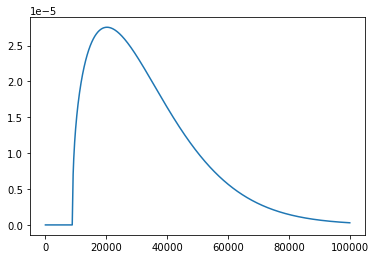

In [225]:
loc = 8889
scale = 26744 
shape = 1.42

x=np.linspace(0,100000,1000)
plt.plot(x,weibull_min.pdf(x,c=shape,scale=scale,loc=loc))

  0%|          | 0/10 [00:00<?, ?it/s]

N = 2210 CodeGeo = 6006 ( Nice )
Median = 29150.0
Mean loc = 8322 scale = 24160 shape = 1.3
Acceptation loc = 49.59% scale = 70.87% shape = 41.80%


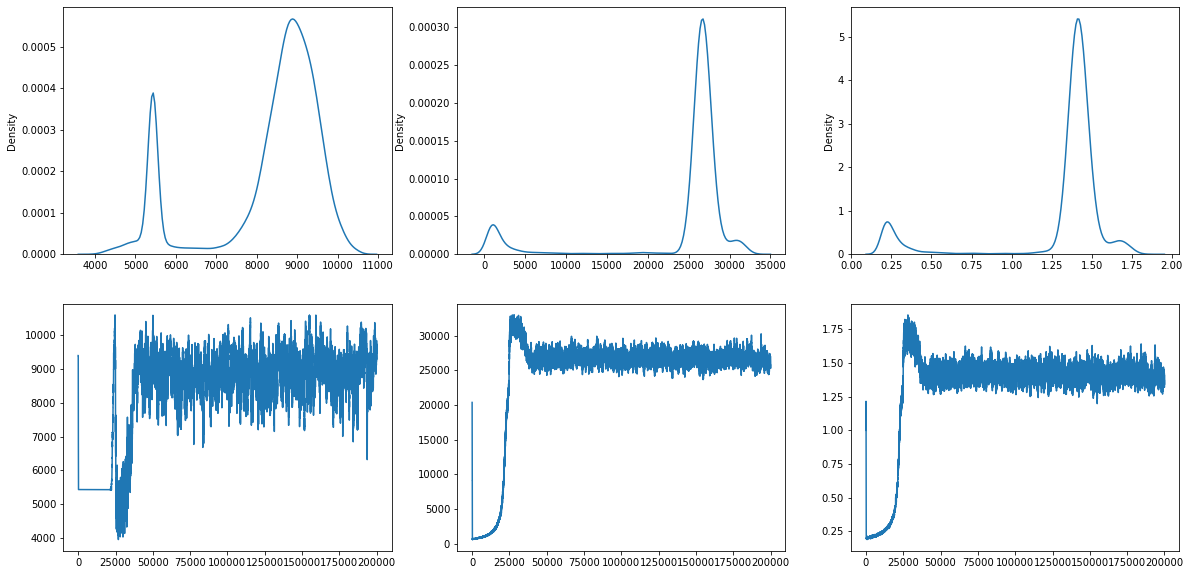

 10%|█         | 1/10 [00:02<00:18,  2.10s/it]

N = 3364 CodeGeo = 6007 ( Cannes )
Median = 25950.0
Mean loc = 6254 scale = 22948 shape = 1.42
Acceptation loc = 49.70% scale = 63.88% shape = 38.66%


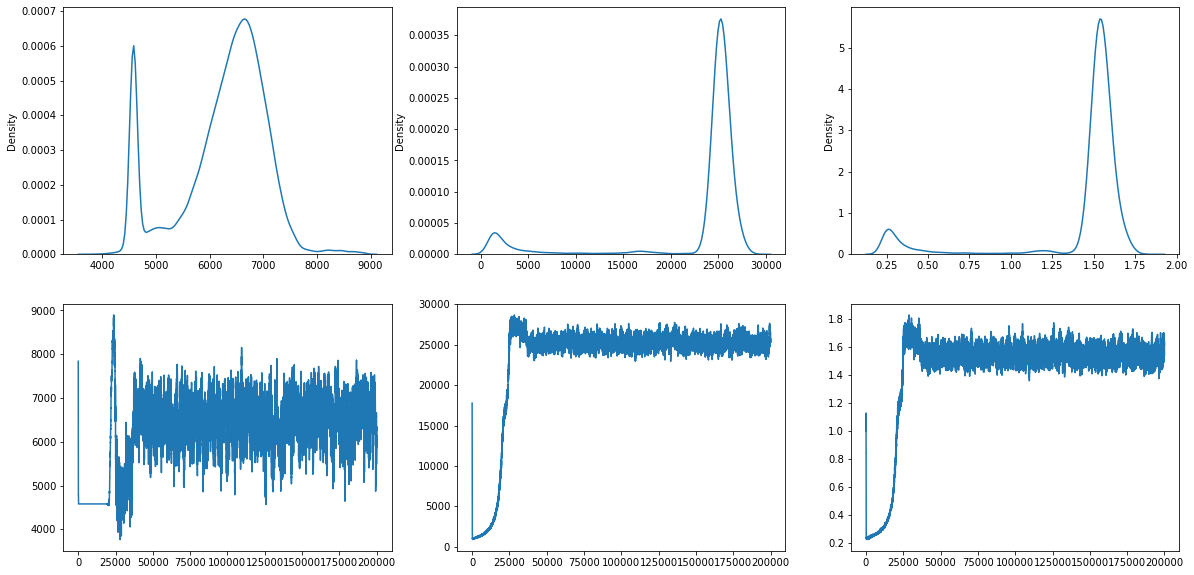

 20%|██        | 2/10 [00:03<00:15,  1.94s/it]

N = 3006 CodeGeo = 6010 ( Antibes )
Median = 24850.0
Mean loc = 2141 scale = 25535 shape = 1.65
Acceptation loc = 65.41% scale = 64.09% shape = 44.79%


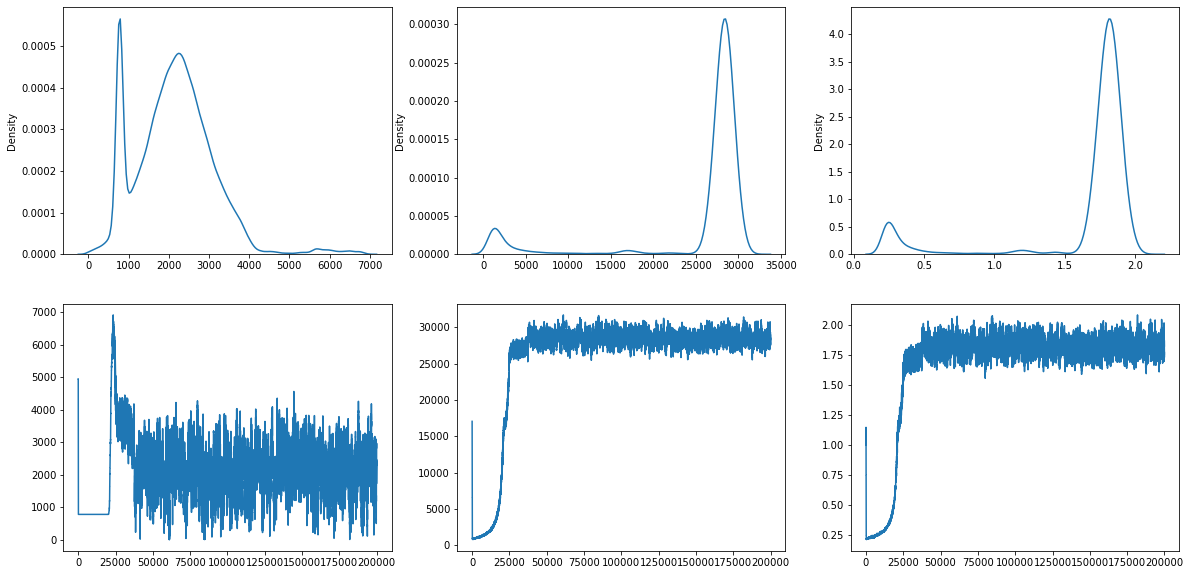

 30%|███       | 3/10 [00:05<00:13,  1.88s/it]

N = 3673 CodeGeo = 6011 ( Grasse )
Median = 23600.0
Mean loc = 2059 scale = 25021 shape = 1.36
Acceptation loc = 44.86% scale = 66.26% shape = 36.29%


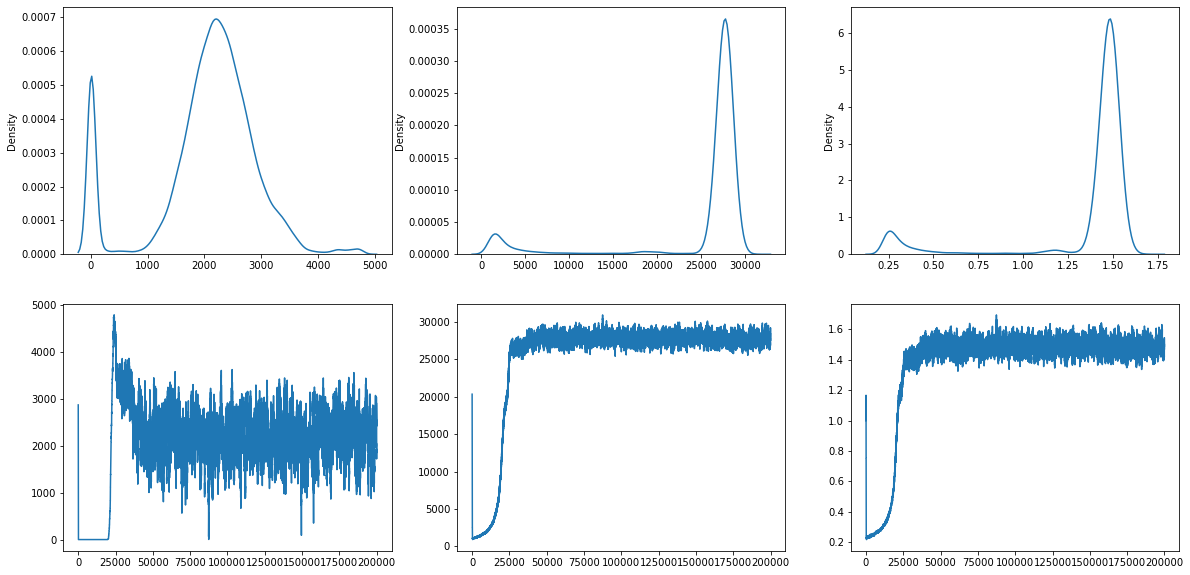

 40%|████      | 4/10 [00:07<00:11,  1.85s/it]

N = 13305 CodeGeo = 6012 ( Cagnes-sur-Mer )
Median = 21840.0
Mean loc = 201 scale = 25352 shape = 1.59
Acceptation loc = 18.35% scale = 45.87% shape = 24.44%


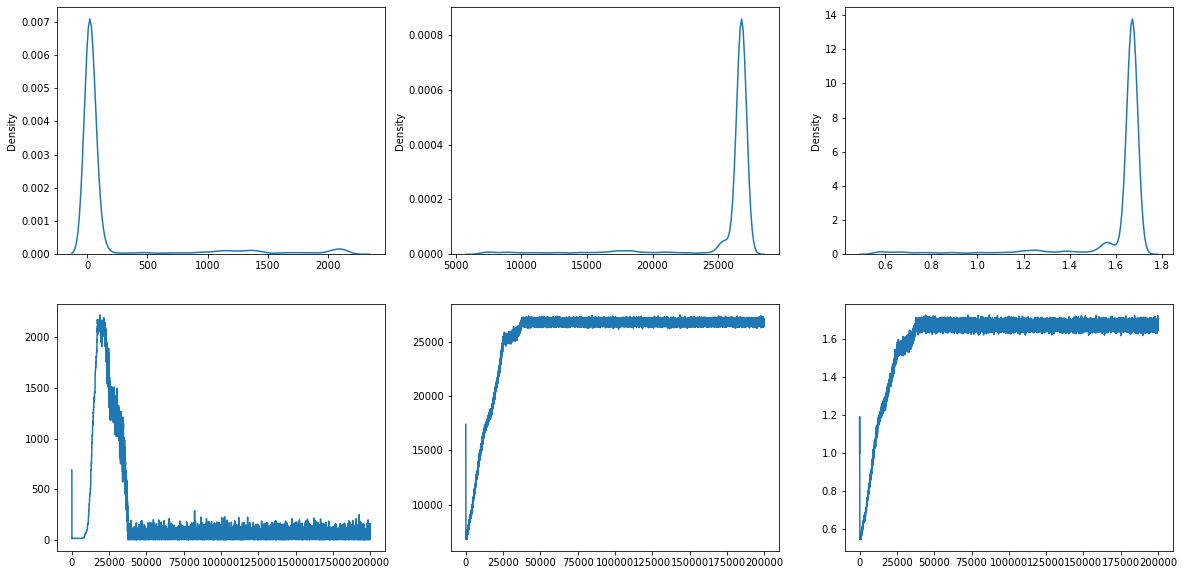

 50%|█████     | 5/10 [00:09<00:09,  1.83s/it]

N = 9309 CodeGeo = 6018 ( Menton )
Median = 30570.0
Mean loc = 7259 scale = 28474 shape = 1.26
Acceptation loc = 19.61% scale = 60.71% shape = 23.13%


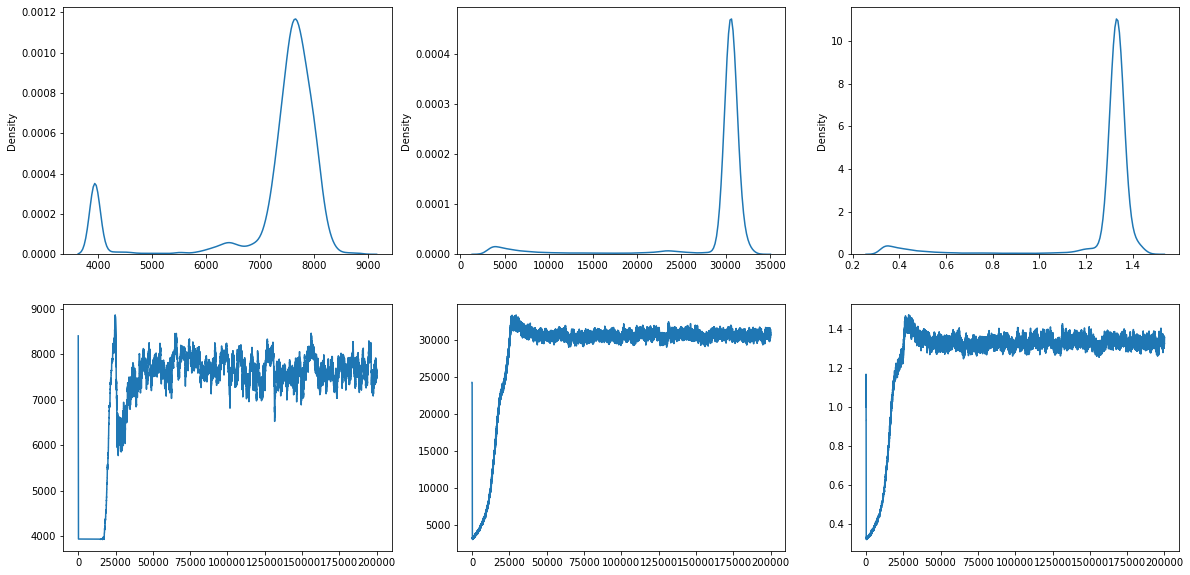

 60%|██████    | 6/10 [00:11<00:07,  1.79s/it]

N = 2018 CodeGeo = 6023 ( Saint-Laurent-du-Var )
Median = 19600.0
Mean loc = 389 scale = 20492 shape = 1.74
Acceptation loc = 56.63% scale = 62.03% shape = 52.15%


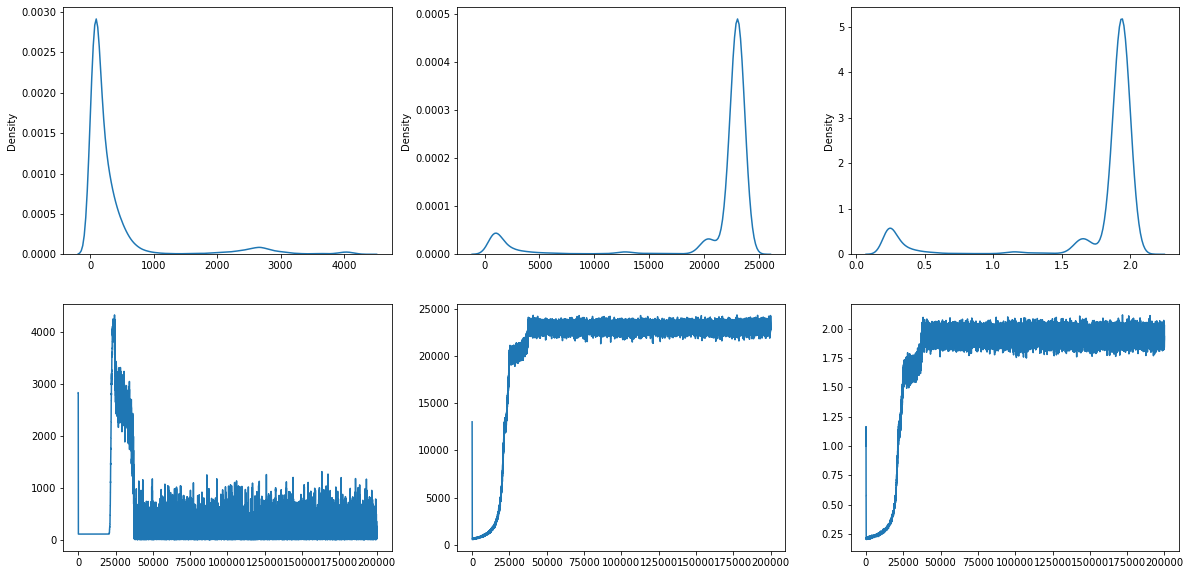

 70%|███████   | 7/10 [00:12<00:05,  1.78s/it]

N = 4295 CodeGeo = 6032 ( Vallauris )
Median = 27030.0
Mean loc = 2216 scale = 28468 shape = 1.47
Acceptation loc = 54.12% scale = 65.53% shape = 36.13%


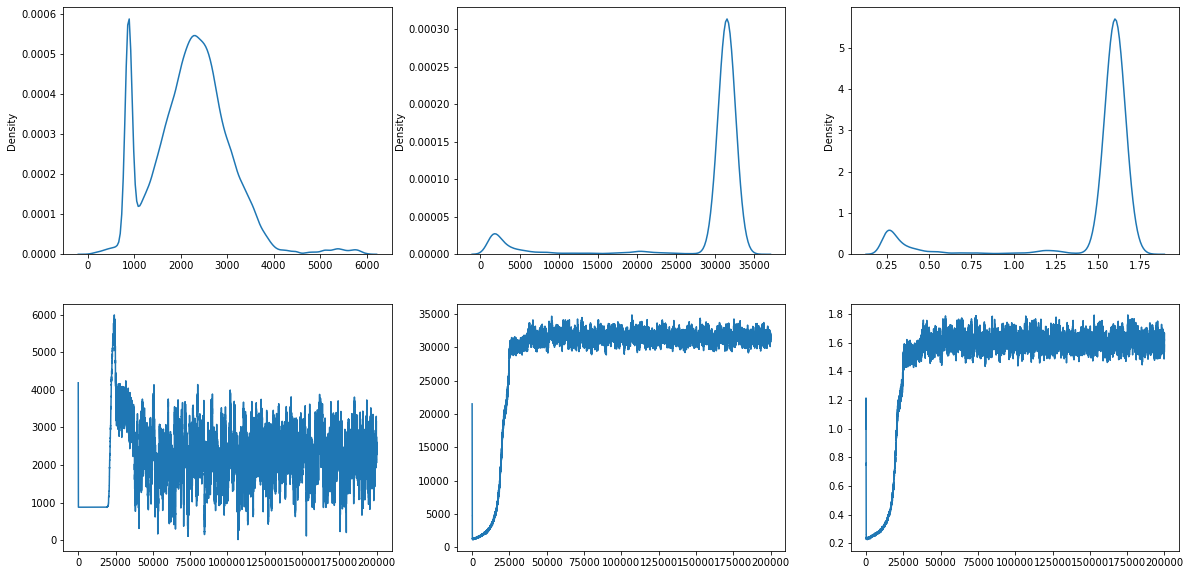

 80%|████████  | 8/10 [00:14<00:03,  1.78s/it]

N = 12619 CodeGeo = 6033 ( Mandelieu-la-Napoule )
Median = 21910.0
Mean loc = 594 scale = 24322 shape = 1.93
Acceptation loc = 37.11% scale = 39.79% shape = 29.65%


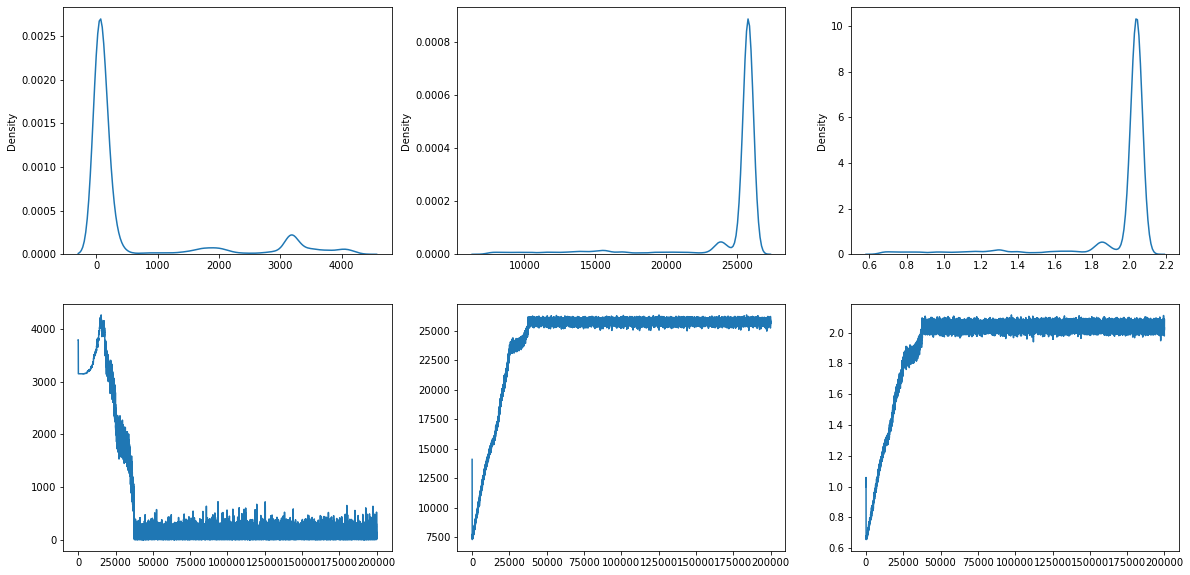

 90%|█████████ | 9/10 [00:16<00:01,  1.76s/it]

N = 3568 CodeGeo = 6038 ( Vence )
Median = 27530.0
Mean loc = 5879 scale = 25944 shape = 1.22
Acceptation loc = 32.63% scale = 69.45% shape = 33.73%


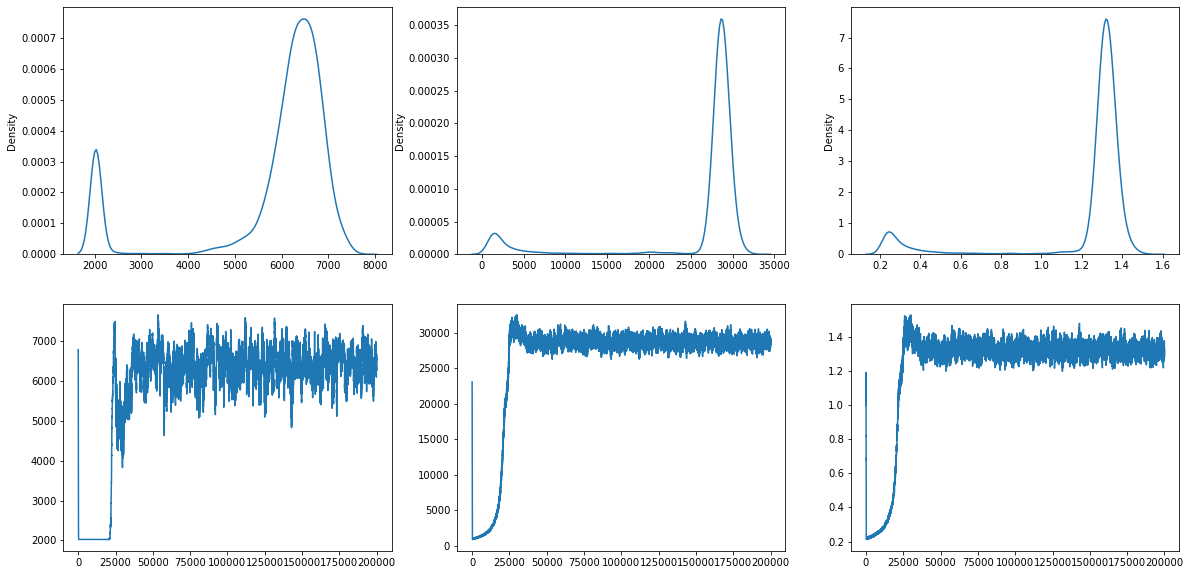

100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


In [250]:
burnin=0
Gibbs=clust
Dist=[]
for i in tqdm(range(min(K,10))):
    f,ax=plt.subplots(2,3,figsize=(20,10))
    
    sns.kdeplot(Gibbs["chains"][0,i][burnin:],ax=ax[0,0])
    ax[1,0].plot(Gibbs["chains"][0,i][burnin:])
    #ax[0,0].axvline(loc2[i],color="red")
    
    sns.kdeplot(Gibbs["chains"][1,i][burnin:],ax=ax[0,1])
    ax[1,1].plot(Gibbs["chains"][1,i][burnin:])
    #ax[0,1].axvline(scale2[i],color="red")

    sns.kdeplot(Gibbs["chains"][2,i][burnin:],ax=ax[0,2])
    ax[1,2].plot(Gibbs["chains"][2,i][burnin:])
    #ax[0,2].axvline(shape2[i],color="red")
    print("N =",N_AM[i],"CodeGeo =",CODE_AM[i],"(",communes[CODE_AM2[i]],')')
    print("Median =",Q_AM[i,5])
    print("Mean loc = {} scale = {} shape = {}".format(int(np.mean(Gibbs["chains"][0,i][burnin:])),int(np.mean(Gibbs["chains"][1,i][burnin:])),np.round(np.mean(Gibbs["chains"][2,i][burnin:]),2)))
    print("Acceptation loc = {:.2%} scale = {:.2%} shape = {:.2%}".format(len(np.unique(Gibbs["chains"][0,i][burnin:]))/len(Gibbs["chains"][0,i][burnin:]),len(np.unique(Gibbs["chains"][1,i][burnin:]))/len(Gibbs["chains"][1,i][burnin:]),len(np.unique(Gibbs["chains"][2,i][burnin:]))/len(Gibbs["chains"][2,i][burnin:])))
    plt.show()
    #print(loc2[i],scale2[i],shape2[i])

MEANS :
a0 = 1.0498129642411043 b0 = 0.00026201495784421326 
a1 = 65.11548228808658 b1 = 0.002327159577540829
a2 = 44.31530444314131 b2 = 27.179736434478446

ACCEPTATION RATES :
a0 = 73.84% b0 = 39.86%
a1 = 42.18% b1 = 44.50%
a2 = 42.27% b2 = 42.82%
44.31530444314131 27.179736434478446


/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


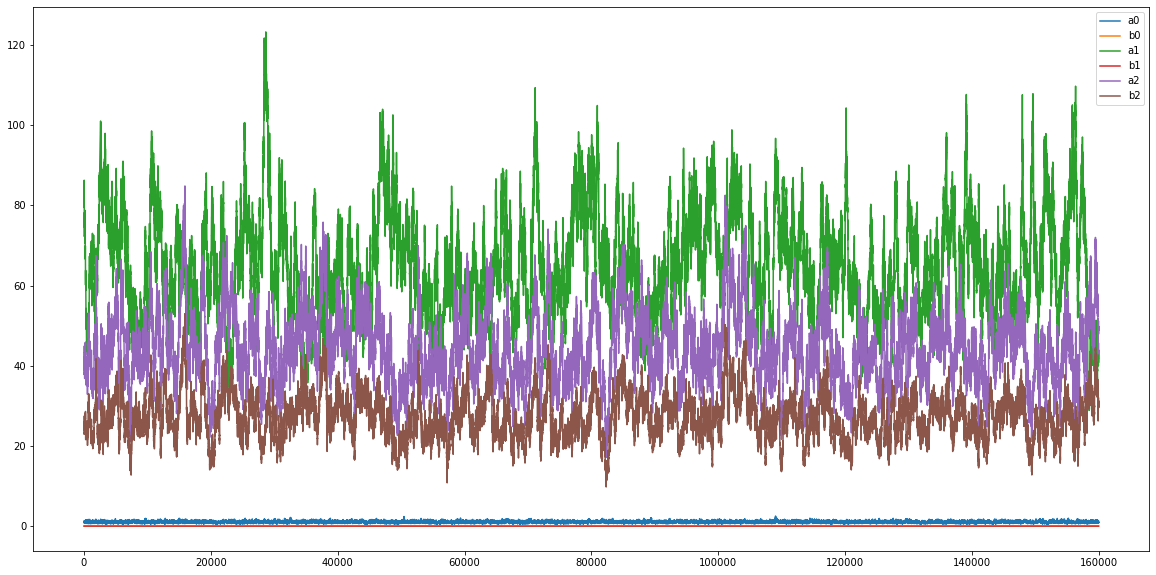

In [246]:
burnin=40000
test2=clust
plt.figure(figsize=((20,10)))
plt.plot(test2["chains_0"][0][burnin:],label="a0")
plt.plot(test2["chains_0"][1][burnin:],label="b0")
#plt.axhline
plt.plot(test2["chains_0"][2][burnin:],label="a1")
#plt.axhline(a1,color="grey")
plt.plot(test2["chains_0"][3][burnin:],label="b1")
#plt.axhline(b1,color="grey")

plt.plot(test2["chains_0"][4][burnin:],label="a2")
#plt.axhline(a2,color="grey")
plt.plot(test2["chains_0"][5][burnin:],label="b2")
#plt.axhline(b2,color="grey")

plt.legend()
#print(a1,b1)
print("MEANS :")
print("a0 = {} b0 = {} ".format(np.mean(test2["chains_0"][0][burnin:]),np.mean(test2["chains_0"][1][burnin:])))
print("a1 = {} b1 = {}".format(np.mean(test2["chains_0"][2][burnin:]),np.mean(test2["chains_0"][3][burnin:])))
print("a2 = {} b2 = {}".format(np.mean(test2["chains_0"][4][burnin:]),np.mean(test2["chains_0"][5][burnin:])))
print("\nACCEPTATION RATES :")
print("a0 = {:.2%} b0 = {:.2%}".format(len(np.unique(test2["chains_0"][0][burnin:]))/len(test2["chains_0"][0][burnin:]),len(np.unique(test2["chains_0"][1][burnin:]))/len(test2["chains_0"][1][burnin:])))
print("a1 = {:.2%} b1 = {:.2%}".format(len(np.unique(test2["chains_0"][2][burnin:]))/len(test2["chains_0"][2][burnin:]),len(np.unique(test2["chains_0"][3][burnin:]))/len(test2["chains_0"][3][burnin:])))
print("a2 = {:.2%} b2 = {:.2%}".format(len(np.unique(test2["chains_0"][4][burnin:]))/len(test2["chains_0"][4][burnin:]),len(np.unique(test2["chains_0"][5][burnin:]))/len(test2["chains_0"][5][burnin:])))

print(np.mean(test2["chains_0"][4][burnin:]),np.mean(test2["chains_0"][5][burnin:]))
f.show()

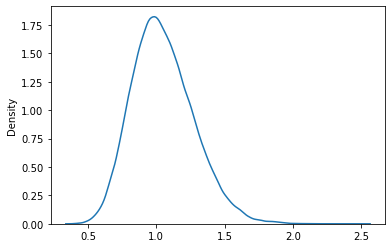

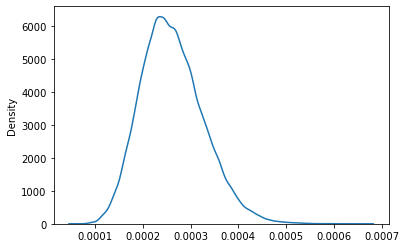

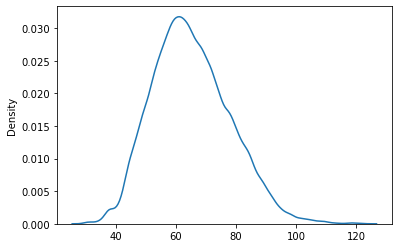

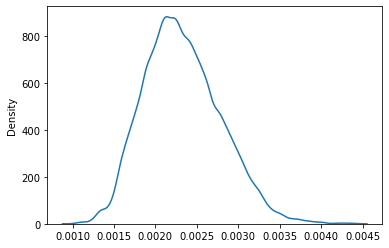

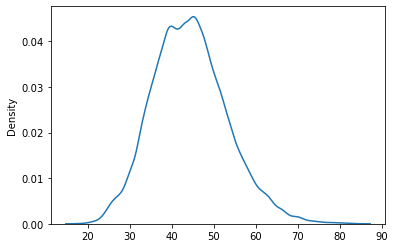

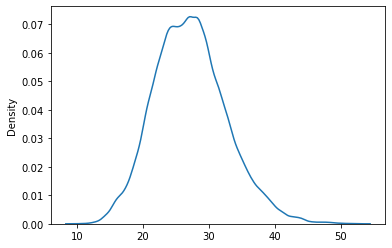

In [247]:
sns.kdeplot(test2["chains_0"][0][burnin:],label="a0")
plt.show()
sns.kdeplot(test2["chains_0"][1][burnin:],label="b0")
plt.show()

#plt.axhline
sns.kdeplot(test2["chains_0"][2][burnin:],label="a1")
plt.show()

#plt.axhline(a1,color="grey")
sns.kdeplot(test2["chains_0"][3][burnin:],label="b1")
plt.show()

#plt.axhline(b1,color="grey")

sns.kdeplot(test2["chains_0"][4][burnin:],label="a2")
plt.show()

#plt.axhline(a2,color="grey")
sns.kdeplot(test2["chains_0"][5][burnin:],label="b2")
plt.show()


In [ ]:
1.0413198780045043 0.0002568922811444749
58.084847325737215 0.0020749963981011805
44.157869557739694 27.106860310940657

1.0157046753119254 0.000251591783986289
68.24013212456374 0.0024374894063376733
41.472082429090364 25.3938569371618


In [182]:
w["chains_0"][:,-1]

array([8.65823431e-01, 1.93983816e-04, 5.55157758e+01, 2.01115862e-03,
       4.00372262e+01, 2.42100868e+01])

6014.317937056103 2236.7880911860066
102.21092193809223 0.8978057789765517
5.034956506304667 13.628779837293425


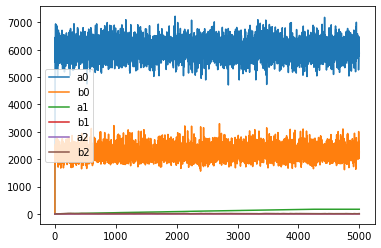

In [ ]:
burnin=0
test2=w7
plt.plot(test2["chains_0"][0][burnin:],label="a0")

plt.plot(test2["chains_0"][1][burnin:],label="b0")
#plt.axhline
plt.plot(test2["chains_0"][2][burnin:],label="a1")
#plt.axhline(a1,color="grey")
plt.plot(test2["chains_0"][3][burnin:],label="b1")
#plt.axhline(b1,color="grey")

plt.plot(test2["chains_0"][4][burnin:],label="a2")
#plt.axhline(a2,color="grey")
plt.plot(test2["chains_0"][5][burnin:],label="b2")
#plt.axhline(b2,color="grey")

plt.legend()
#print(a1,b1)
print(np.mean(test2["chains_0"][0][burnin:]),np.mean(test2["chains_0"][1][burnin:]))

print(np.mean(test2["chains_0"][2][burnin:]),np.mean(test2["chains_0"][3][burnin:]))
#print(a2,b2)
print(np.mean(test2["chains_0"][4][burnin:]),np.mean(test2["chains_0"][5][burnin:]))
plt.show()

In [ ]:
4400.242864838399 3133.6895556686973
71.25334103121656 0.0025498447539516605
27.539047088352042 16.63493348753602

4382.691416786899 3138.654042078566
51.30371052097838 0.001829434023055585
27.359957847959013 16.5150274917125

In [229]:
len(CODE_AM),K

(46, 47)

6424.995139785193 28672.435517140795 1.321975973481587
5264.672698183299 30295.91790703313 1.469010337296139
8651.835010252064 25554.885016020722 1.4890512256697583
1978.1190572732228 26188.668613853548 2.1944153972054767
133.84570612540847 24364.385442403065 1.8422590027954422


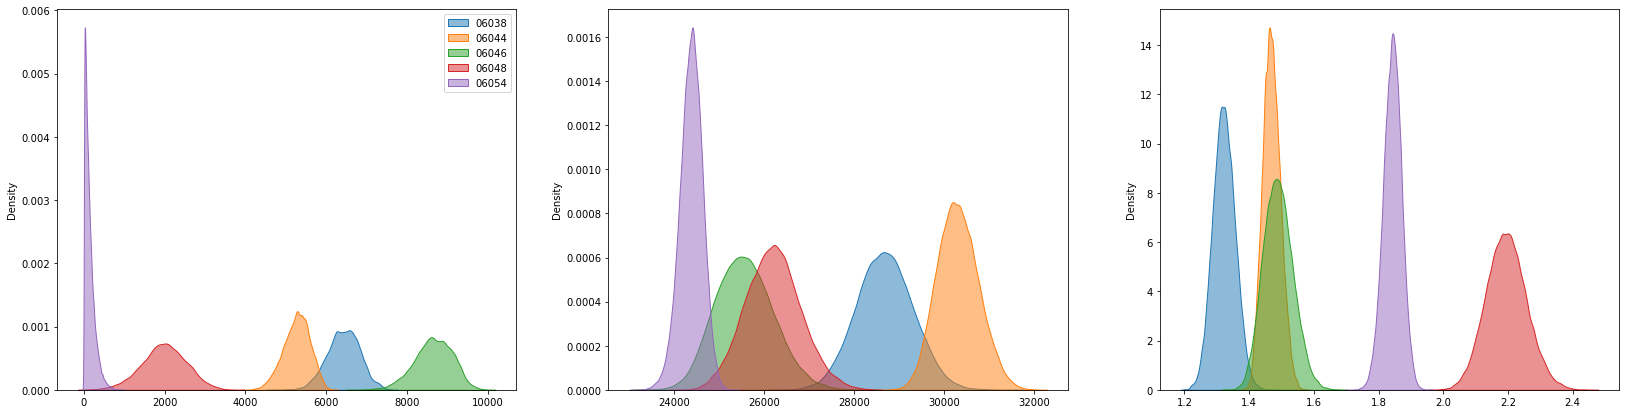

In [257]:
burnin=50000
Gibbs=clust
f,ax=plt.subplots(1,3,figsize=(28,7))
K=46
k=9
for i in range(k,k+5):
    
    sns.kdeplot(Gibbs["chains"][0,i][burnin:],ax=ax[0],label=str(CODE_AM2[i]),fill=True,alpha=.5)
    #ax[0,0].axvline(loc2[i],color="red")
    
    sns.kdeplot(Gibbs["chains"][1,i][burnin:],ax=ax[1],fill=True,alpha=.5)

    #ax[0,1].axvline(scale2[i],color="red")

    sns.kdeplot(Gibbs["chains"][2,i][burnin:],ax=ax[2],fill=True,alpha=.5)
    #ax[0,2].axvline(shape2[i],color="red")
    print(np.mean(Gibbs["chains"][0,i][burnin:]),np.mean(Gibbs["chains"][1,i][burnin:]),np.mean(Gibbs["chains"][2,i][burnin:]))
ax[0].legend()
    #print(loc2[i],scale2[i],shape2[i])

0 2 36781 2.026020064594618


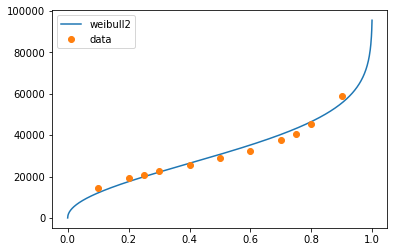

1 2 32565 2.0600065187101864


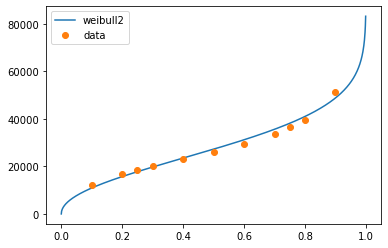

2 2 30881 2.0046660389327084


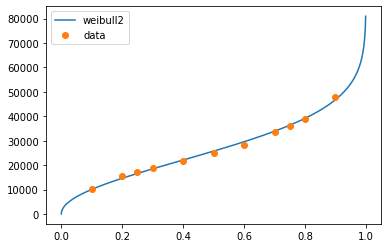

3 2 30390 1.6525287484301057


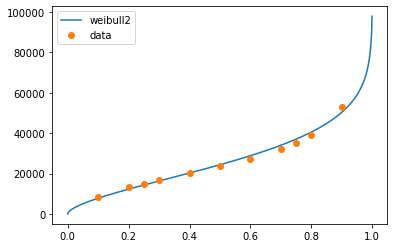

4 2 26822 1.6750564898070264


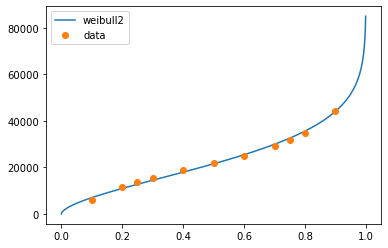

5 2 39586 1.7917702494577363


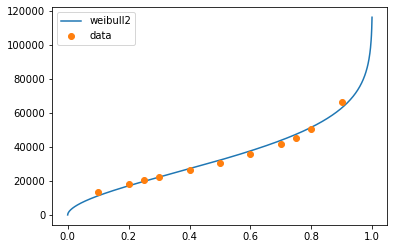

6 2 23290 1.9694032992462922


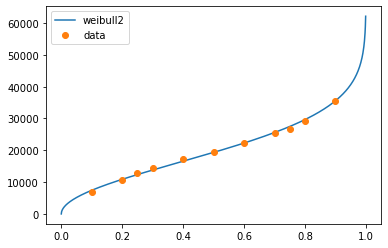

7 2 34161 1.7605232400591166


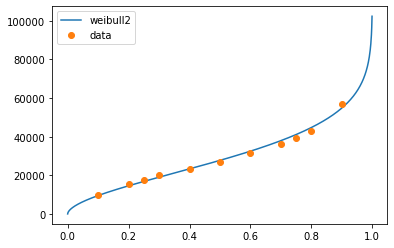

8 2 25862 2.0495367721084077


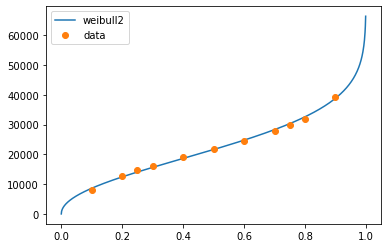

9 2 36244 1.72855765651118


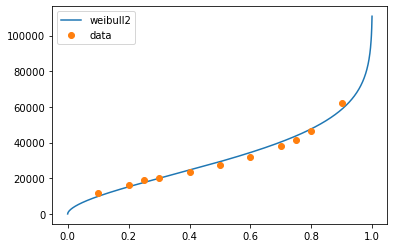

10 2 36367 1.814610886129042


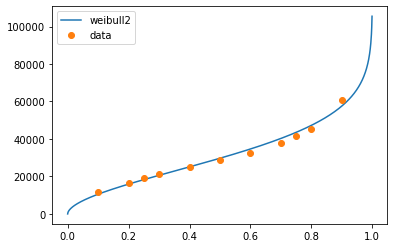

11 2 35231 2.1378626208348024


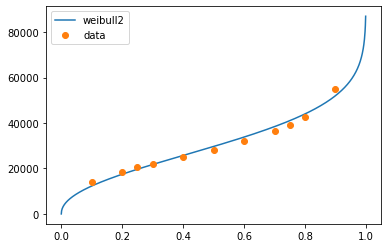

12 2 28312 2.398928486008563


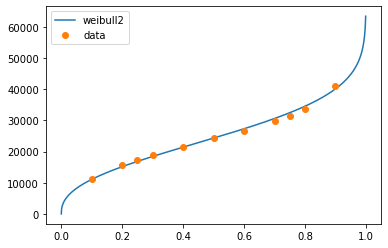

13 2 24527 1.8589488607109348


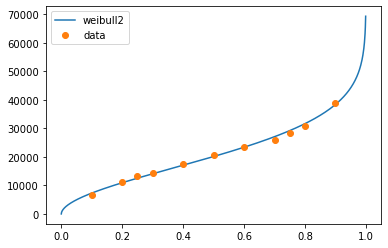

14 2 24672 2.2845498597539544


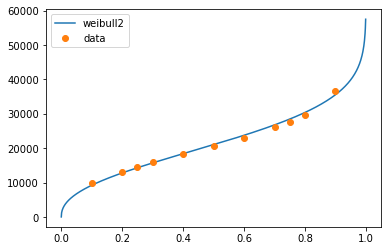

15 2 39766 1.6576410892522275


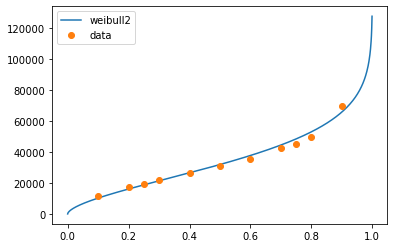

16 2 45964 1.5619059448373525


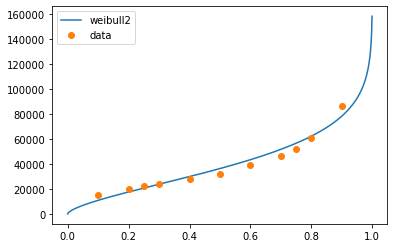

17 2 32659 2.1320024377366145


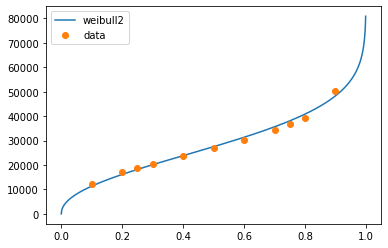

18 2 36042 2.0960082878852737


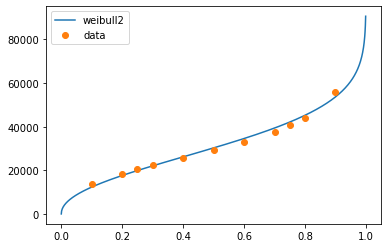

19 2 29402 2.258236898695265


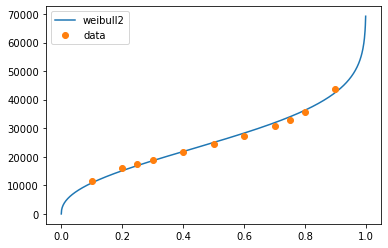

20 1 29649 1.8544555032525314


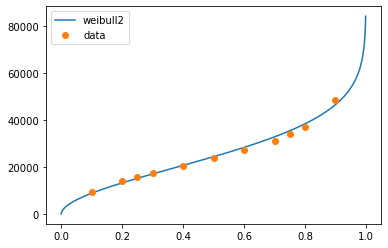

21 2 35185 1.7942859878424329


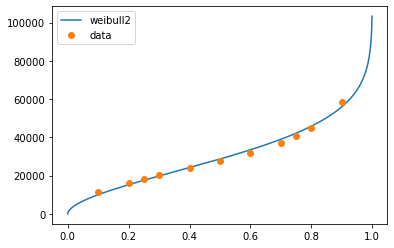

22 1 35644 1.68263253232794


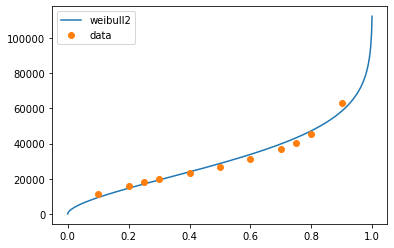

23 2 42486 1.7126495332455975


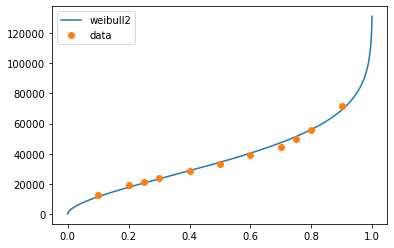

24 2 29861 2.3044903243246715


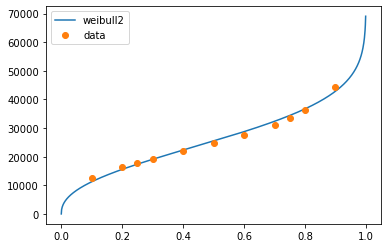

25 2 30238 2.1277566251289777


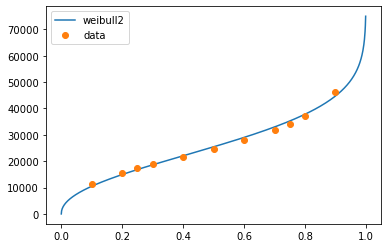

26 2 31649 1.7784307442049143


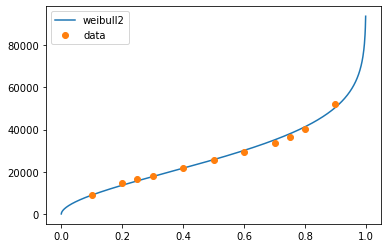

27 2 43920 1.7704881640504844


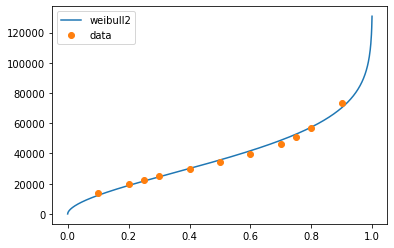

28 2 33424 2.035037184107429


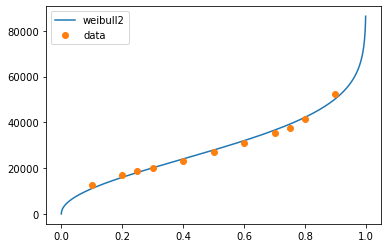

29 2 39213 1.8350518097300432


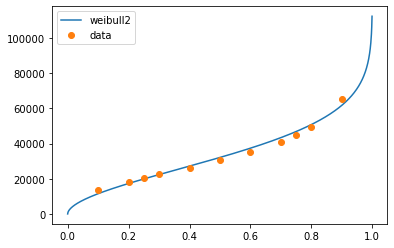

30 2 25447 1.8610587415734527


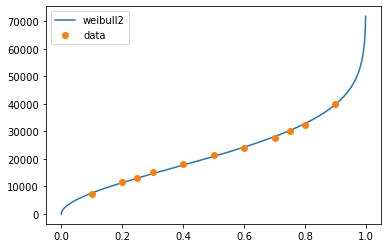

31 2 29681 2.153353699648247


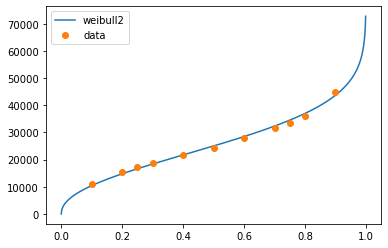

32 2 33929 1.9783015569664029


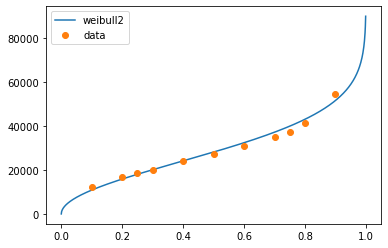

33 2 27822 2.301268653078956


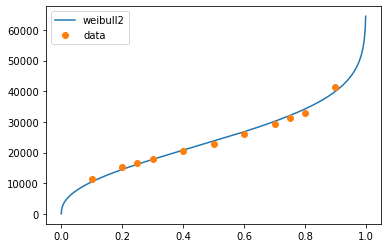

34 2 40100 1.5864319725726448


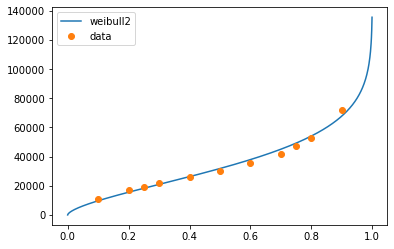

35 2 28875 2.2682910811737096


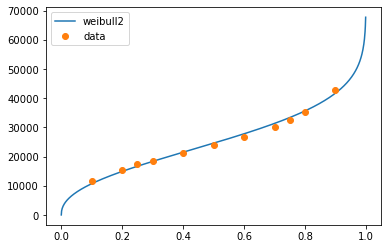

36 2 26238 2.170976708997803


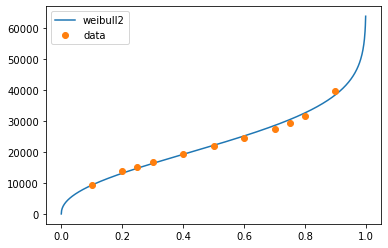

37 2 31567 2.1119041156280742


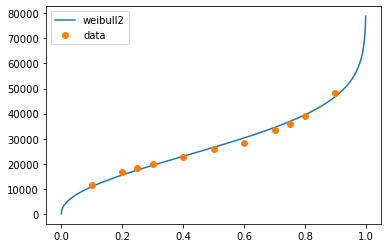

38 2 30046 2.302185933502081


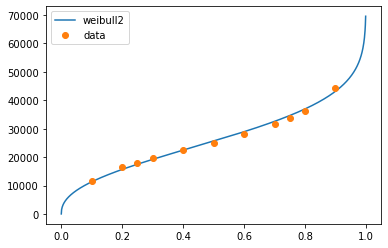

39 2 34451 1.784010873930312


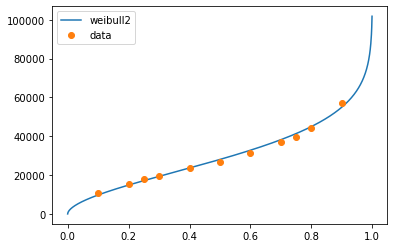

40 2 25176 2.1980852868713896


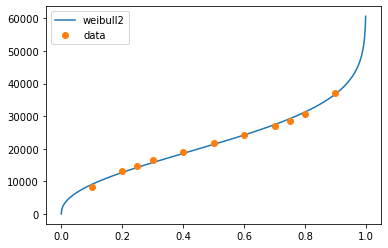

41 2 39817 1.699216073199854


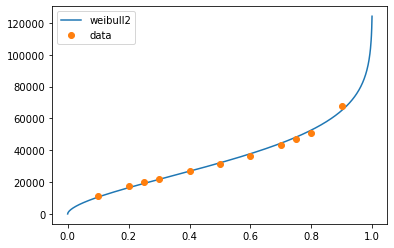

42 2 35720 1.7835914742845402


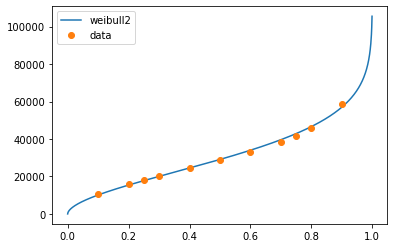

43 2 29971 1.6719733677776314


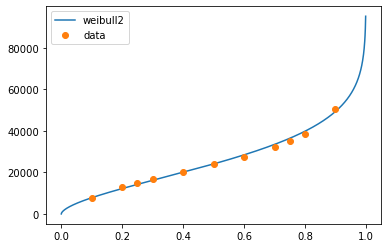

44 2 35653 1.4925165852348428


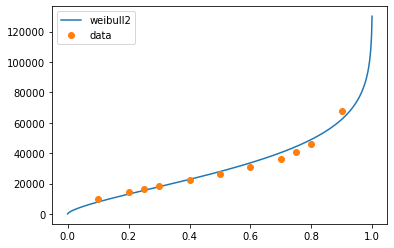

45 1 32963 1.8412380947085591


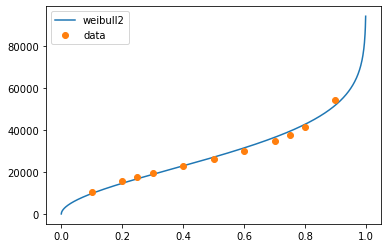

In [ ]:
x=np.linspace(0,1,1000)
Gibbs=w6
for i in range(K):
    loc_m,scale_m,shape_m=np.mean(Gibbs["chains"][0,i][burnin:]),np.mean(Gibbs["chains"][1,i][burnin:]),np.mean(Gibbs["chains"][2,i][burnin:])
    plt.plot(x,weibull_min(c=shape_m,scale=scale_m,loc=loc_m).ppf(x),label="weibull2")
    plt.plot(P_AM[i],Q_AM[i],'o',label="data")
    print(i,int(loc_m),int(scale_m),(shape_m))
    plt.legend()
    plt.show()

In [ ]:

def ABC(q,N,T):
    #D=[]
    Theta=[]
    a1,b1=59.24075568688441, 0.002090055204143697
    a2,b2=28.107598662583307, 16.875313650319555
    mu_0,sigma_0=3833.627656428395, 3303.012071191
    for t in tqdm(range(T)):
        theta=[np.random.normal(mu_0,sigma_0,size=1)[0],gamma.rvs(a1,scale=1/b1,size=1)[0],gamma.rvs(a2,scale=1/b2,size=1)[0]]
        X=scipy.stats.weibull_min(c=theta[2],scale=theta[1],loc=theta[0]).rvs(N)
        q_star=np.quantile(X,[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9])
        #D.append(np.linalg.norm(q-q_star))
        Theta.append(theta+[np.linalg.norm(q-q_star)])
    return Theta


In [ ]:
Thetaa=ABC(Q_AM[0],N_AM[0],1000000)

100%|██████████| 1000000/1000000 [12:01<00:00, 1385.60it/s]


In [ ]:
abc=pd.DataFrame(np.array(Thetaa).T,index=["loc","scale","shape","Dist"]).T
abc.sort_values(by="Dist",inplace=True)
abc.head()

,loc,scale,shape,Dist
367566,10291.908410,24952.805159,1.336149,2257.382344
105415,12768.949691,22273.356212,1.163219,2605.947821
692129,10011.236928,25050.585251,1.288737,2650.447795
84916,11509.582882,23051.895228,1.260239,2806.819545
480058,10295.262384,24502.014323,1.315269,2817.542466


In [ ]:
print(abc.iloc[0],"Mean loc = 8684 scale = 26986 shape = 1.43")

loc      10291.908410
scale    24952.805159
shape        1.336149
Dist      2257.382344
Name: 367566, dtype: float64 Mean loc = 8684 scale = 26986 shape = 1.43


8837.954322796691 26806.757426311233 1.4222887910945576
6610.27936477241 25156.90022627669 1.5357482252455332
2200.089176010956 28433.253004013255 1.821237131287945
2.020675268009629 36781.50949975831 2.026020064594618
2.034859027107517 32565.172406968515 2.0600065187101864
2.0253994865551332 30881.348997474288 2.0046660389327084


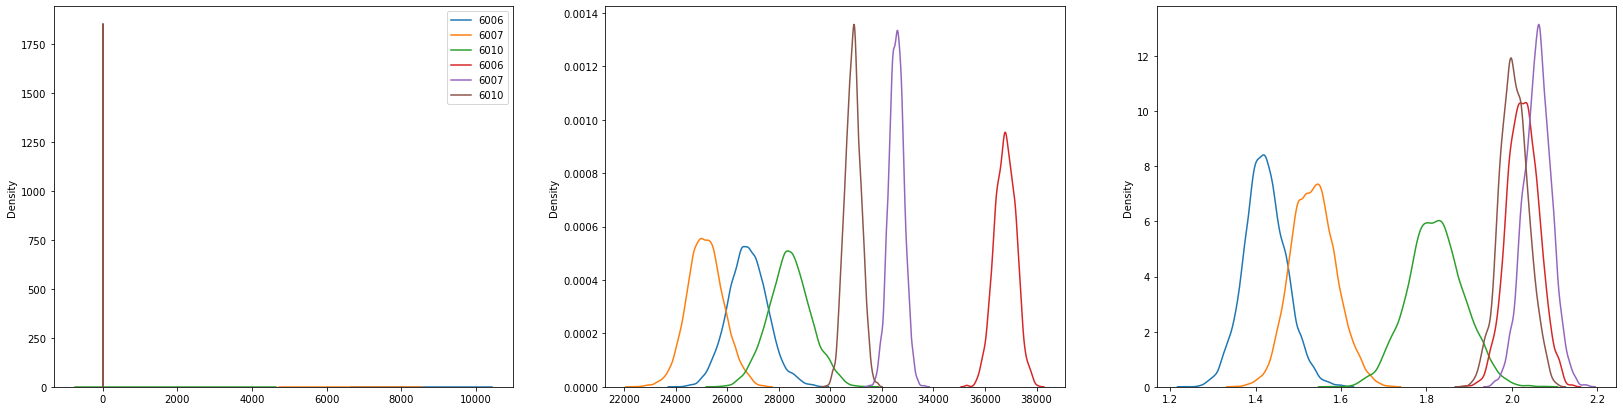

In [ ]:
burnin=25000
f,ax=plt.subplots(1,3,figsize=(28,7))
for Gibbs in [w5,w6]:
    for i in (range(3)):
        
        sns.kdeplot(Gibbs["chains"][0,i][burnin:],ax=ax[0],label=str(CODE_AM[i]))
        #ax[0,0].axvline(loc2[i],color="red")
        
        sns.kdeplot(Gibbs["chains"][1,i][burnin:],ax=ax[1])

        #ax[0,1].axvline(scale2[i],color="red")

        sns.kdeplot(Gibbs["chains"][2,i][burnin:],ax=ax[2])
        #ax[0,2].axvline(shape2[i],color="red")
        print(np.mean(Gibbs["chains"][0,i][burnin:]),np.mean(Gibbs["chains"][1,i][burnin:]),np.mean(Gibbs["chains"][2,i][burnin:]))
ax[0].legend()

In [ ]:
def Gibbs_Quantile(
    T,
    N,
    Q,
    P,
    n_chains,
    distribution,
    par_prior=[0, 1, 1, 1, 1, 1],
    std_prop1=0.1,
    std_prop2=0.1,
    std_prop3=0.1,
    std_prop_quantile=0.1,
    List_X=False,
    epsilon=0.001,
    verbose=True,
    shape=1,
):
    log_norm = False
    if distribution == "normal":
        loc = Q[len(Q) // 2]

        scale = (Q[-1] - Q[0]) / (
            scipy.stats.norm(loc).ppf(P[-1]) - scipy.stats.norm(loc).ppf(P[0])
        )
        theta = [loc, scale]
        if verbose:
            print("Init loc = {} and scale = {}".format(loc, scale))
    if distribution == "lognormal":
        Q = np.log(Q)
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (
            scipy.stats.norm(loc).ppf(P[-1]) - scipy.stats.norm(loc).ppf(P[0])
        )
        theta = [loc, scale]
        log_norm = True
        distribution = "normal"
        if verbose:
            print("Init loc = {} and scale = {}".format(loc, scale))
    if distribution == "cauchy":
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (
            scipy.stats.cauchy(loc).ppf(P[-1]) - scipy.stats.cauchy(loc).ppf(P[0])
        )
        theta = [loc, scale]

        if verbose:
            print("Init loc = {} and scale = {}".format(loc, scale))
    if distribution == "weibull" or distribution == "weibull2":
        loc = Q[0] - (Q[1] - Q[0])
        if distribution == "weibull2":
            loc = 0
        shape = 1.5
        scale = (Q[-1] - Q[0]) / (
            scipy.stats.weibull_min(shape, loc=loc).ppf(P[-1])
            - scipy.stats.weibull_min(shape, loc=loc).ppf(P[0])
        )
        # loc,shape,scale=10,3,2
        theta = [loc, scale, shape]

        if verbose:
            print("Init loc = {},scale = {} shape = {}".format(loc, scale, shape))
    X, I, G, q_sim, q_tot, K = Quantile_Init2(
        Q, P, N, loc, scale, distribution, epsilon=epsilon, shape=shape
    )
    # print("Min = {}, Max = {}".format(np.min(X),np.max(X)))
    # print(X)

    Theta = [theta]
    X_list = [X]
    Mean = [np.mean(X)]
    Std = [np.std(X)]
    Q_Tot = [q_tot]
    Q_Sim = [q_sim]

    for i in tqdm(range(T), disable=not (verbose)):
        X, q_sim, q_tot = X_Q(
            Q,
            q_sim,
            q_tot,
            N,
            Theta[-1][0],
            Theta[-1][1],
            K,
            I,
            G,
            distribution,
            std_prop_quantile,
            shape=shape,
        )

        if distribution == "normal":
            mu, tau = post_NG(X, par_prior)
            theta = [mu, 1 / np.sqrt(tau)]
        elif distribution == "lognormal":
            mu, tau = post_NG(np.log(X), par_prior)
            # print(np.std(np.log(X)),np.sqrt(1/tau))
            theta = [mu, np.sqrt(1 / tau)]
        elif distribution == "cauchy":
            loc = post_cauchy_theta(
                Theta[-1][0], Theta[-1][1], X, par_prior[:2], std_prop1
            )
            scale = post_cauchy_gamma(loc, Theta[-1][1], X, par_prior[2:], std_prop2)
            theta = [loc, scale]

        elif distribution == "weibull" or distribution == "weibull2":
            # print(np.min(X),loc)
            if distribution == "weibull2":
                loc = 0
            else:
                loc = post_weibull_loc2(Theta[-1][0],Theta[-1][1],Theta[-1][2],X,par_prior[:2],std_prop1)
            scale = post_weibull_scale(
                loc, Theta[-1][1], Theta[-1][2], X, par_prior[2:4], std_prop2
            )
            shape = post_weibull_k(
                loc, scale, Theta[-1][2], X, par_prior[4:], std_prop3
            )
            theta = [loc, scale, shape]

        Theta.append(theta)
        Mean.append(np.mean(X))
        Std.append(np.std(X))

        Q_Tot.append(list(q_tot))

        Q_Sim.append(list(q_sim))
        if List_X:
            X_list.append(X)

    if not (List_X):
        X_list.append(X)

    if log_norm:
        X_list = np.exp(np.array(X_list))
        Q_Sim = np.exp(np.array(Q_Sim))
        Q_Tot = np.exp(np.array(Q_Tot))

    if verbose:
        Q = np.array(Q_Sim).T
        print("I=", I, "Q.shape=", Q.shape)
        for i in range(Q.shape[0]):
            q = Q[i]
            print(
                "Acceptance rate of Q {} = {:.2%}".format(i, len(np.unique(q)) / len(q))
            )
    # if verbose:print("Acceptance rate of Q =  {:.2%}".format((len(np.unique(Q_Sim,axis=0))-1)/len(Q_Sim)))
    if verbose and distribution == "cauchy":
        print(
            "Acceptation rate of loc = {:.2%} and of scale = {:.2%}".format(
                len(np.unique(np.array(Theta)[:, 0], axis=0)) / len(Theta),
                len(np.unique(np.array(Theta)[:, 1], axis=0)) / len(Theta),
            )
        )
    if verbose and (distribution == "weibull" or distribution == "weibull2"):
        print(
            "Acceptation rate of loc = {:.2%}, of scale = {:.2%} and of shape = {:.2%}".format(
                len(np.unique(np.array(Theta)[:, 0], axis=0)) / len(Theta),
                len(np.unique(np.array(Theta)[:, 1], axis=0)) / len(Theta),
                len(np.unique(np.array(Theta)[:, 2], axis=0)) / len(Theta),
            )
        )
    return {
        "X": X_list,
        "Mean": Mean,
        "Std": Std,
        "chains": np.array(Theta).T,
        "Q_sim": np.array(Q_Sim),
        "Q_tot": np.array(Q_Tot),
        "I": I,
        "K": K,
        "G": G,
        "par_prior": par_prior,
        "distribution": distribution,
        "Q": Q,
        "P": P,
        "N": N,
    }

In [ ]:
post_weibull_loc2(1,1,1,[1,1,1],[1,1],1)

1

In [77]:
test_gamma=test4b

In [109]:
i=4
parprior=[10,.0002,10,.0002,1,.0002]
test4=Gibbs_Quantile(10000,N_AM[i],Q_AM[i],P_AM[i],1,"weibull",par_prior=parprior,std_prop1=100,std_prop2=300,std_prop3=.05,std_prop_quantile=.01)
    


Init loc = 690.0,scale = 25140.631220353847 shape = 1.5


100%|██████████| 10000/10000 [03:25<00:00, 48.64it/s]


I= [ 1331.  2661.  3327.  3992.  5322.  6653.  7983.  9313.  9979. 10644.
 11974.] Q.shape= (8, 10001)
Acceptance rate of Q 0 = 46.18%
Acceptance rate of Q 1 = 31.62%
Acceptance rate of Q 2 = 21.85%
Acceptance rate of Q 3 = 28.25%
Acceptance rate of Q 4 = 26.12%
Acceptance rate of Q 5 = 20.74%
Acceptance rate of Q 6 = 27.29%
Acceptance rate of Q 7 = 44.17%
Acceptation rate of loc = 32.92%, of scale = 47.47% and of shape = 25.74%


N = 13305 CodeGeo = 6012 ( Cagnes-sur-Mer )
Median = 21840.0
Mean loc = 233 scale = 26548 shape = 1.65
Mean loc = -3369 scale = 30593 shape = 1.96
Acceptation loc = 32.89% scale = 47.43% shape = 25.69%


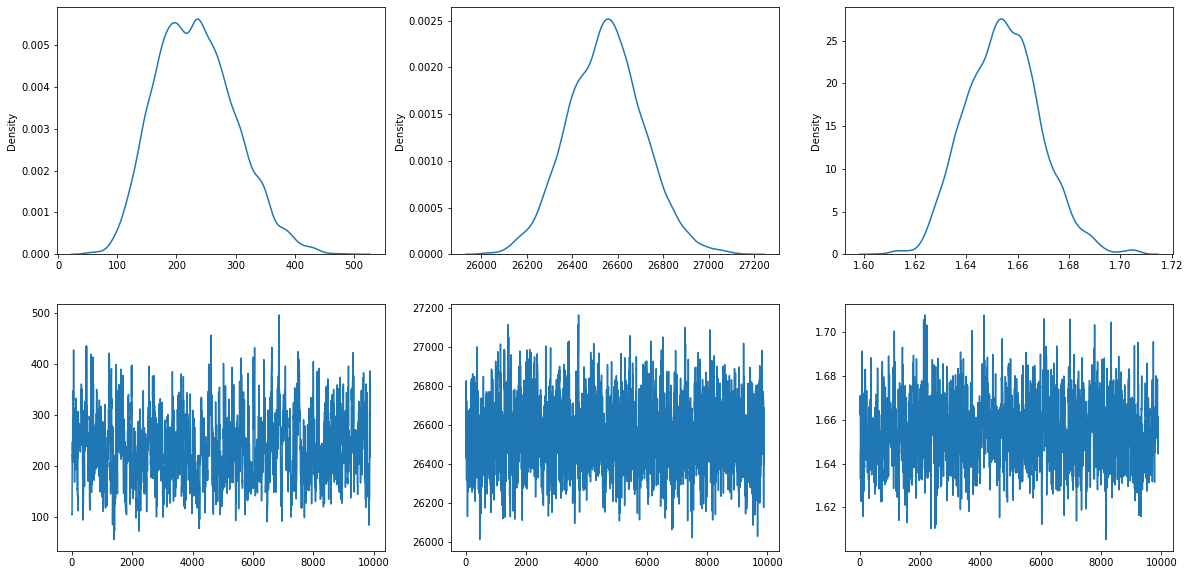

In [110]:
f,ax=plt.subplots(2,3,figsize=(20,10))
Gibbs=test4
burnin=110
sns.kdeplot(Gibbs["chains"][0][burnin:],ax=ax[0,0])
ax[1,0].plot(Gibbs["chains"][0][burnin:])
#ax[0,0].axvline(loc2[i],color="red")

sns.kdeplot(Gibbs["chains"][1][burnin:],ax=ax[0,1])
ax[1,1].plot(Gibbs["chains"][1][burnin:])
#ax[0,1].axvline(scale2[i],color="red")

sns.kdeplot(Gibbs["chains"][2][burnin:],ax=ax[0,2])
ax[1,2].plot(Gibbs["chains"][2][burnin:])
#ax[0,2].axvline(shape2[i],color="red")
print("N =",N_AM[i],"CodeGeo =",CODE_AM[i],"(",communes[CODE_AM2[i]],')')
print("Median =",Q_AM[i,5])
print("Mean loc = {} scale = {} shape = {}".format(int(np.mean(Gibbs["chains"][0][burnin:])),int(np.mean(Gibbs["chains"][1][burnin:])),np.round(np.mean(Gibbs["chains"][2][burnin:]),2)))
print("Mean loc = -3369 scale = 30593 shape = 1.96")
print("Acceptation loc = {:.2%} scale = {:.2%} shape = {:.2%}".format(len(np.unique(Gibbs["chains"][0][burnin:]))/len(Gibbs["chains"][0][burnin:]),len(np.unique(Gibbs["chains"][1][burnin:]))/len(Gibbs["chains"][1][burnin:]),len(np.unique(Gibbs["chains"][2][burnin:]))/len(Gibbs["chains"][2][burnin:])))
plt.show()

In [103]:
x=np.linspace(0,1,1000)
# Gibbs=w5
# i=4
# burnin=25000
# loc_m,scale_m,shape_m=np.mean(Gibbs["chains"][0,i][burnin:]),np.mean(Gibbs["chains"][1,i][burnin:]),np.mean(Gibbs["chains"][2,i][burnin:])
# plt.plot(x,weibull_min(c=shape_m,scale=scale_m,loc=loc_m).ppf(x),label="weibulk3")
# plt.plot(P_AM[i],Q_AM[i],'o',label="data3")

print(i,int(loc_m),int(scale_m),(shape_m))
Q_W3=weibull_min(c=shape_m,scale=scale_m,loc=loc_m).ppf(P_AM[i])
Gibbs=test4
burnin=1000
loc_m,scale_m,shape_m=np.mean(Gibbs["chains"][0][burnin:]),np.mean(Gibbs["chains"][1][burnin:]),np.mean(Gibbs["chains"][2][burnin:])
plt.plot(x,weibull_min(c=shape_m,scale=scale_m,loc=loc_m).ppf(x),label="weibull2")

print(i,int(loc_m),int(scale_m),(shape_m))
Q_W2=weibull_min(c=shape_m,scale=scale_m,loc=loc_m).ppf(P_AM[i])

print("Dist3=",np.linalg.norm(Q_AM[i]-Q_W3))
print("Dist2=",np.linalg.norm(Q_AM[i]-Q_W2))
plt.legend()
plt.show()

NameError: name 'loc_m' is not defined

In [184]:
w["chains_0"][:2,-1]

array([8.65823431e-01, 1.93983816e-04])

4463.3797195510215 4451.936464437295


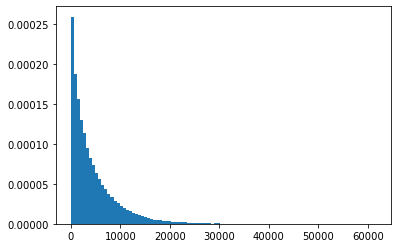

In [185]:
a1,b1=w["chains_0"][:2,-1]
ga=gamma.rvs(a1,scale=1/b1,size=199999)
print(a1/b1,np.mean(ga))
plt.hist(ga,bins=100,density=True);